In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier
)
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import warnings
warnings.filterwarnings('ignore')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv('/content/drive/MyDrive/CsvFiles/EasyVisa.csv')

In [64]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [65]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 25480 rows and 12 columns.


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [67]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The majority of visa applicants are from Asia.

- Most applicants hold a Bachelor's degree, have job experience, and do not require job training based on the initial summary.

- The number of employees in a company ranges up to 602,069, which is possible for large corporations, but the minimum value is –26, which is impossible and indicates incorrect or corrupted data.

- The Northeast region has the highest number of applicants.

- The oldest company was started in 1800.The company established in FY 2016 also have loan applicants.

- Prevailing wages range from \$2.1367 to \$319210.27, and the mean wage is close to the median, suggesting a roughly normal distribution. However, a minimum wage of around $2 is unrealistic in the U.S. due to minimum wage laws, indicating erroneous entries.

- Most employees are reported with a yearly wage unit.

- A majority of the applicants are applying for full-time positions, and most of these applications are certified.

**Check data values in categorical columns**

In [68]:

categorical_columns = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
for cols in categorical_columns:
  print(f'{cols}: {df[cols].unique()}')
  print('-'*70)

continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
----------------------------------------------------------------------
education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
----------------------------------------------------------------------
region_of_employment: ['West' 'Northeast' 'South' 'Midwest' 'Island']
----------------------------------------------------------------------
unit_of_wage: ['Hour' 'Year' 'Week' 'Month']
----------------------------------------------------------------------
full_time_position: ['Y' 'N']
----------------------------------------------------------------------
case_status: ['Denied' 'Certified']
----------------------------------------------------------------------


**Note :**
- Oceania is a geographic region comprising thousands of islands in the central and South Pacific Ocean. It includes Australia, New Zealand, Papua New Guinea, Fiji, and many other island nations and territories.


**Check for Null Values**

In [69]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- There are no null values in the dataset

**Check for Duplicated Rows**

In [70]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate records in the dataset

**Data Cleaning**

- Negative employee count is invalid, so treat it as missing.We can impute it null values later

In [71]:
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = np.nan

- Drop column `case_id` as its a unique identifier for each application and contains no predictive information.
- Drop column  `yr_of_estab` as the raw “year of establishment” itself is not meaningful and it will behave like a random numeric variable.
- Add a column `age_of_company` that may have some predictive power.`Company age = year of dataset - yr_of_estab`.Let's assume the FY 2016(mentioned in objective of problem statement) as year of dataset.This is because the age of a company demonstrates its stability and visa records history.

In [72]:
df['age_of_company'] = 2016 - df['yr_of_estab']
df = df.drop(['case_id', 'yr_of_estab'], axis=1)

In [73]:
df.isna().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,33
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0
case_status,0


- 33 records have null values regarding the number of employess in the company

# EDA

## Univariate Analysis

In [74]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [75]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25447 non-null  float64
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
 10  age_of_company         25480 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 2.1+ MB


### Applicant Profile

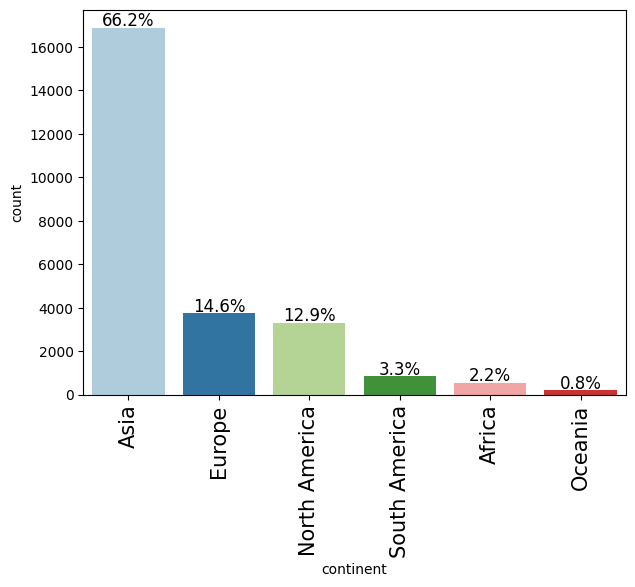

In [77]:
labeled_barplot(df, 'continent', perc=True)

- About 66% of all applicants are from Asia
- Europe (14.6%) and North America (12.9%) form the next major groups, while other continents contribute only a small fraction (<4%).

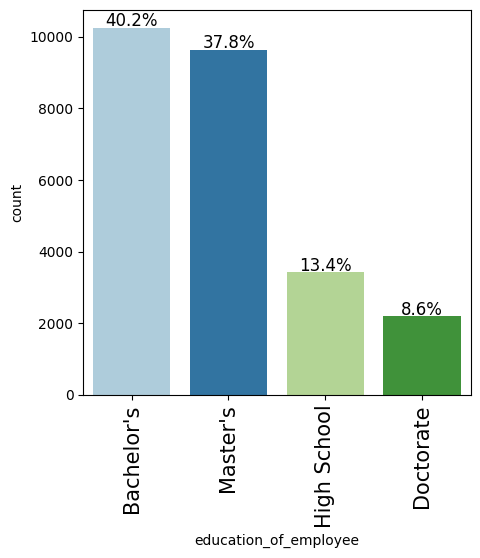

In [78]:
labeled_barplot(df, 'education_of_employee', perc=True)

- Most applicants hold a Bachelor's or Master's degree.Together they make up over 78% of the dataset, indicating that visa applicants are predominantly highly educated.
- Doctorate holders represent 8.6%, and High School graduates 13.4%, showing fewer applications from lower or highest education extremes.

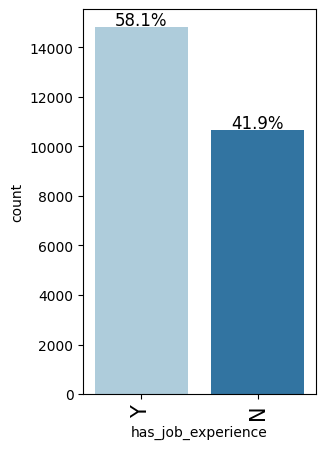

In [79]:
labeled_barplot(df, 'has_job_experience', perc=True)

- 58\% of the applications mention the applicant has previous job experience

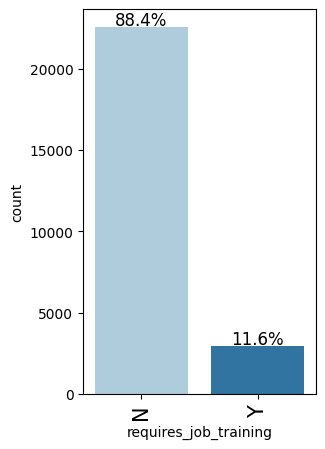

In [80]:
labeled_barplot(df, 'requires_job_training', perc=True)

- 88.4% of the applicants don't require any job training.
- This aligns with the fact that a large share of applicants hold Bachelor's or Master's degrees, suggesting they already possess the skills and qualifications needed for the roles being sponsored.

### Employer/Company Profile

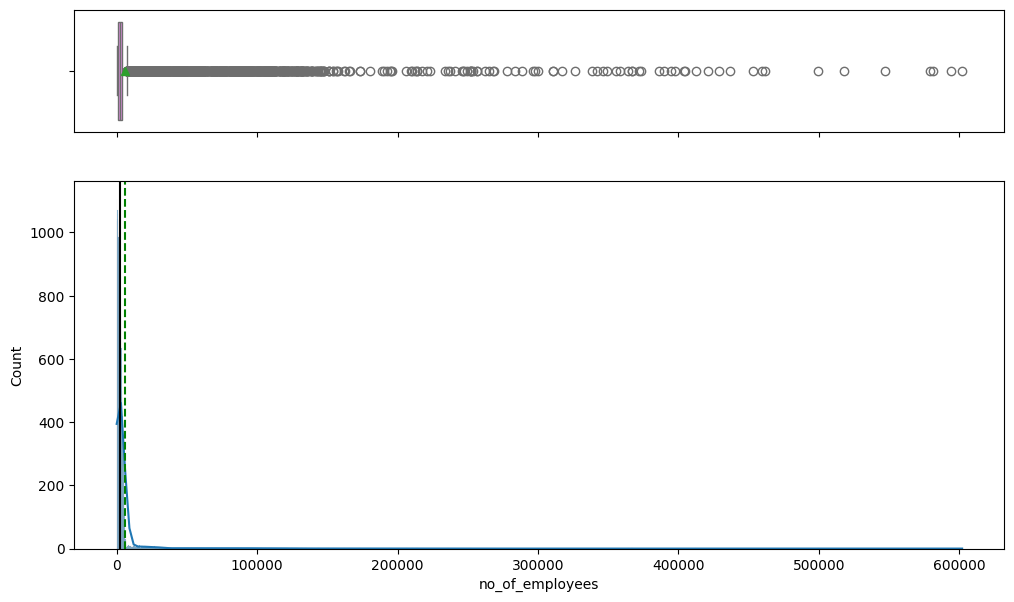

In [81]:
histogram_boxplot(df, 'no_of_employees', kde=True)

- The distribution is extremely right-skewed and has a large number of outliers, with most companies having very few employees(~1000), while a small number have upto 6 lakh employess

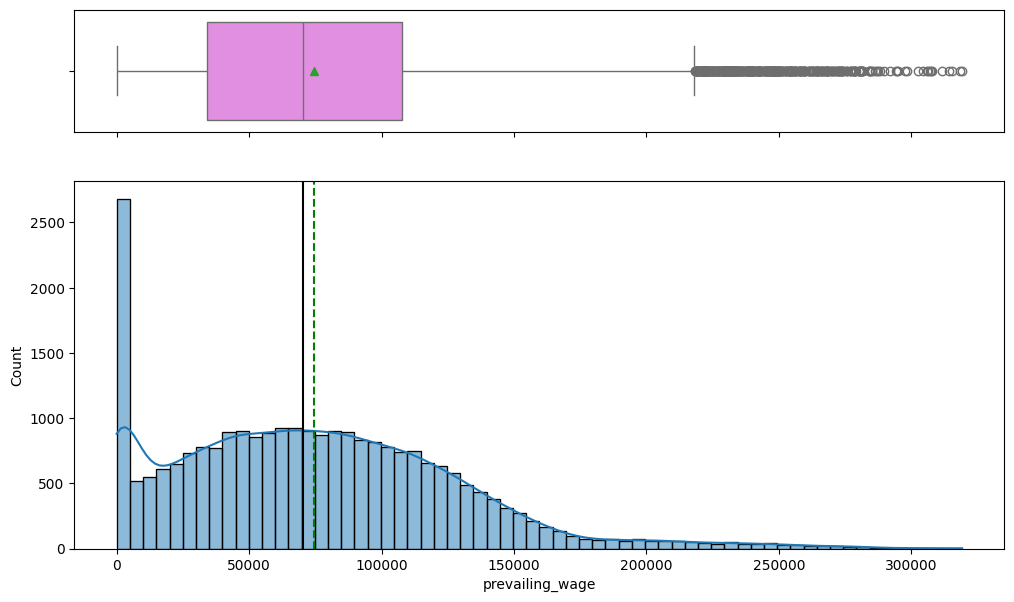

In [82]:
histogram_boxplot(df, 'prevailing_wage', kde=True)

- The wage distribution is right-skewed, with most applicants earning less than \$150,000, while a smaller number earn very high wages extending beyond \$250,000.
- The boxplot shows a significant number of high-wage outliers, indicating large variation in salaries
- Some data points are near very low wages, suggesting the presence of incorrect or unrealistic wage values (e.g., wages close to $0), which may require further inspection

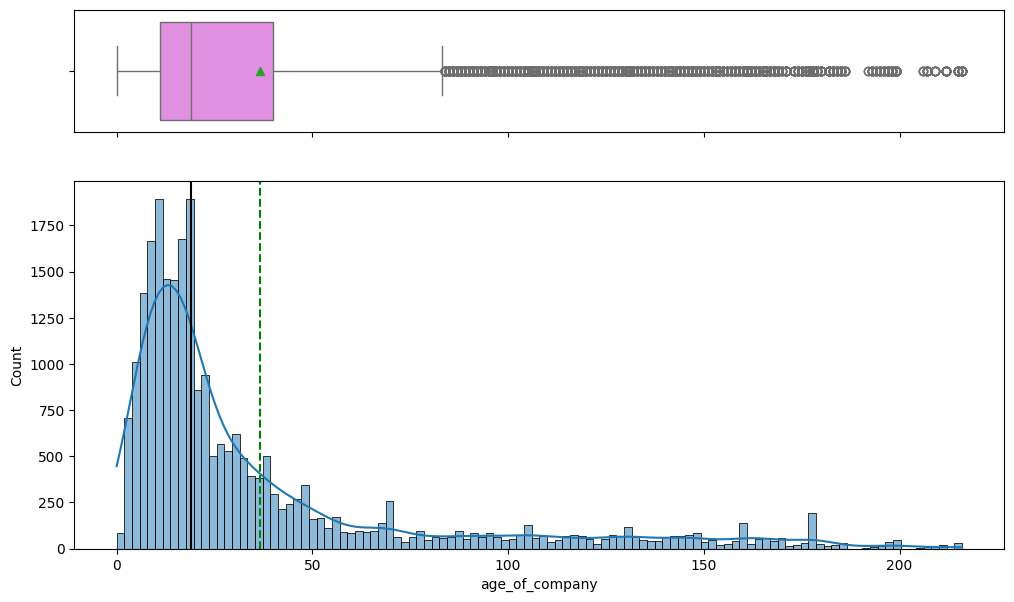

In [83]:
histogram_boxplot(df, 'age_of_company', kde=True)

- The company age distribution shows a strong right skew, with most companies being under 50 years old and only a few long-established firms exceeding 200 years in age.

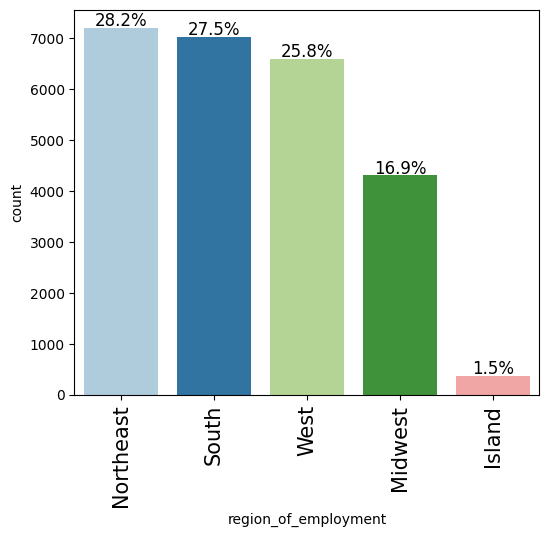

In [84]:
labeled_barplot(df, 'region_of_employment', perc=True)

- Norteast and South employers have almost same percentage of applicants(~28\%), followed by west with ~26%
- Midwest having ~17\%.Island region has the lowest of < 2%

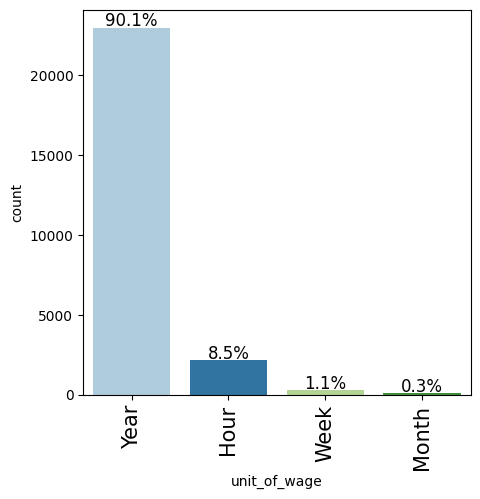

In [85]:
labeled_barplot(df, 'unit_of_wage', perc=True)

- 90\% of the applicants wages are specified as annual income.This indicates that most visa-sponsoring job roles are full-time salaried positions
- Only 8.5\% use hourly wages, and <2\% use weekly or monthly.This might be suggesting a part-time role

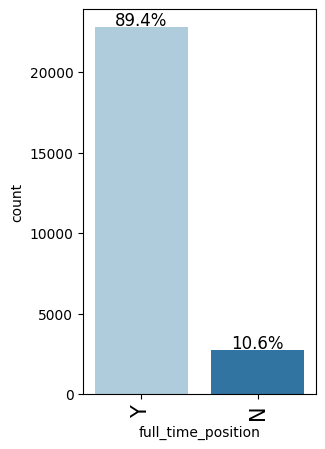

In [86]:
labeled_barplot(df, 'full_time_position', perc=True)

- Out of all the applications, only ~89.4\% applicants are provided a full-time job role

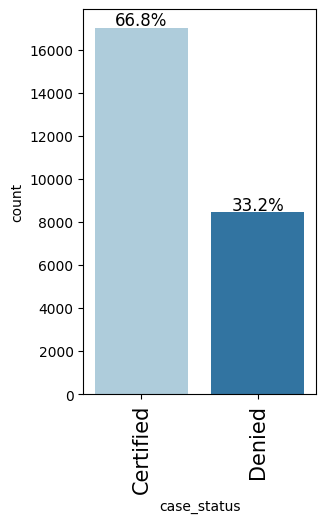

In [87]:
labeled_barplot(df, 'case_status', perc=True)

- ~67\% of the applications are certified, rest 33\% are rejected
- There is a high class imbalance in the dataset

## Bivariate Analysis

<Axes: >

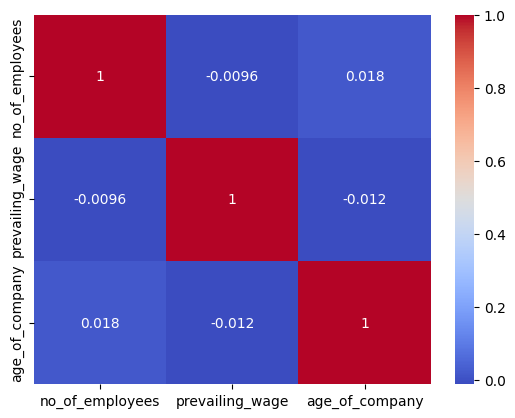

In [88]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')

- There is no strong correlation between age of a company and the number of employees working in it

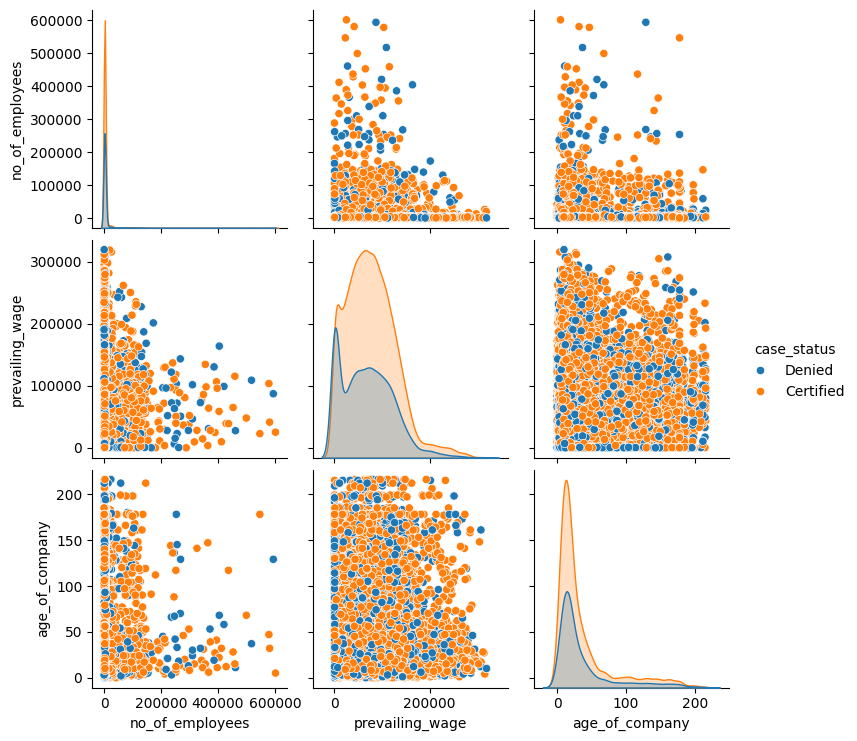

In [89]:
sns.pairplot(df, hue='case_status')

- There is no strong link between company size or company age and approval.


In [90]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [91]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


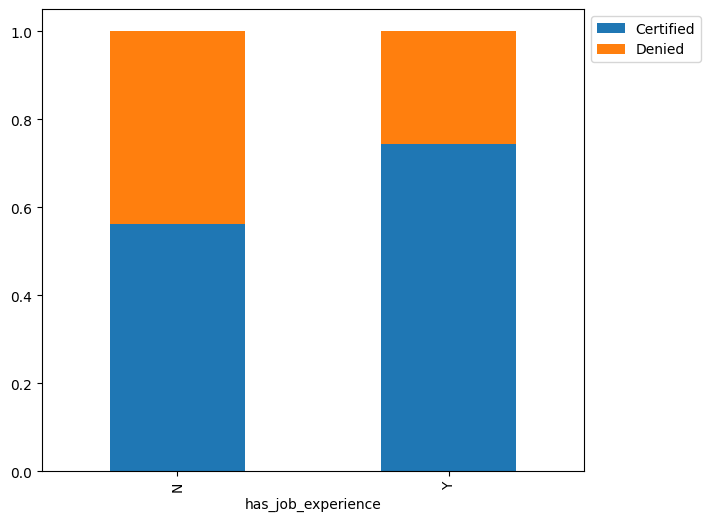

In [92]:
stacked_barplot(df, 'has_job_experience', 'case_status')

- Applicants with job experience (Y) have a noticeably higher certification rate, with the majority being certified and only a small portion denied.
- Those without job experience (N) face a higher denial rate, as the proportion of denied cases is significantly larger compared to experienced applicants.
- Overall, prior job experience appears to strongly improve the likelihood of visa certification.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


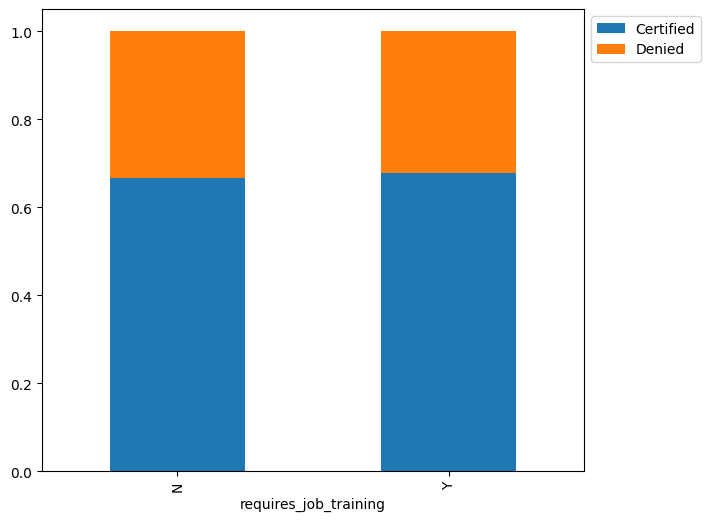

In [93]:
stacked_barplot(df, 'requires_job_training', 'case_status')

- Certification rates look almost identical for applicants who require job training and those who don't, suggesting that training requirements do not significantly influence visa outcomes.
- Denied proportions are also nearly the same across both groups, indicating that job training is not a decisive factor in approval or rejection.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


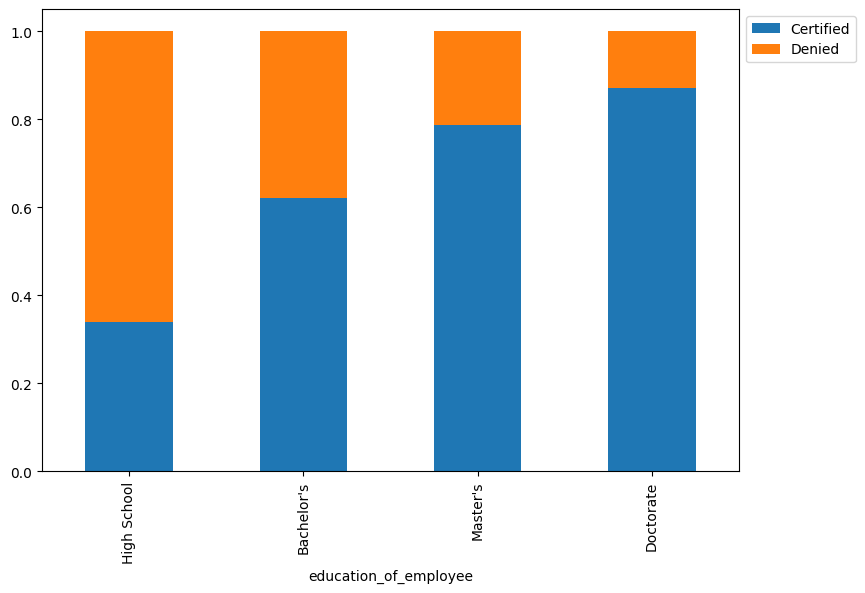

In [94]:
stacked_barplot(df, 'education_of_employee', 'case_status')

- A clear upward trend is visible — as education increases from High School → Bachelor's → Master's → Doctorate, the proportion of certified cases steadily rises.
- This suggests that advanced qualifications strongly strengthen visa approval chances, likely because they align with specialized, skill-based job requirements.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


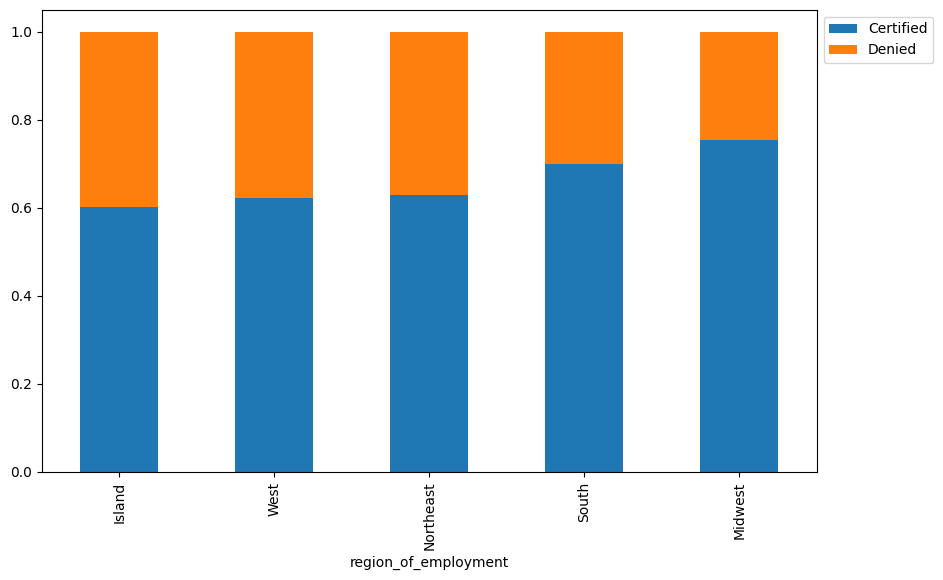

In [95]:
stacked_barplot(df, 'region_of_employment', 'case_status')

- The Midwest shows the highest certification share, while the West and Northeast have comparatively higher denial proportions.
- Overall, region of employment doesn't appear to be a strong differentiator of visa outcomes, indicating regional bias is minimal.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


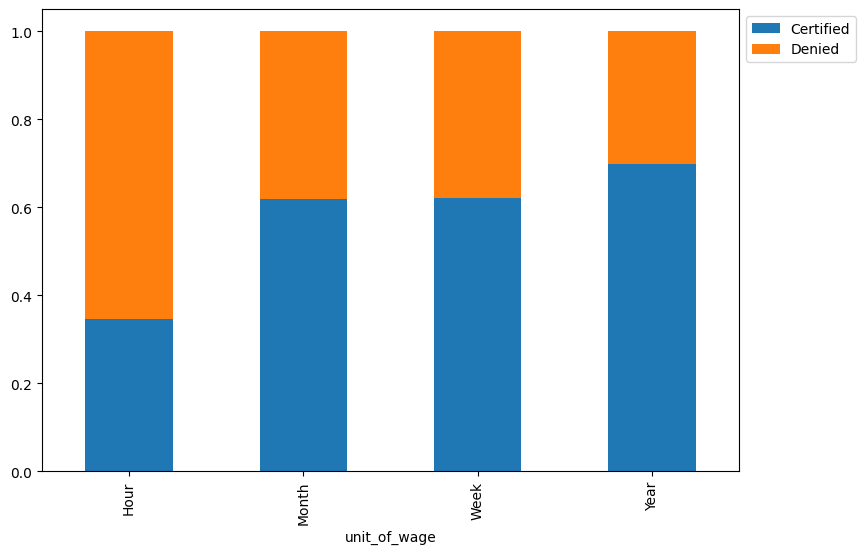

In [96]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

- Applicants paid hourly wages have a much higher denial rate, indicating lower-wage or part-time roles may face stricter scrutiny.

- Yearly and monthly wage units show the highest certification rates, suggesting that stable, full-time salaried positions are more likely to be approved.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


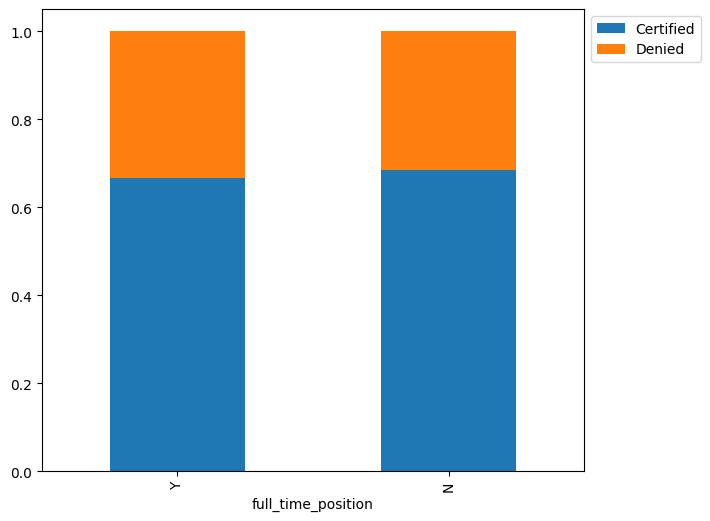

In [97]:
stacked_barplot(df, 'full_time_position', 'case_status')

- Certification rates are almost the same for full-time and non-full-time positions, suggesting that full-time status alone is not a strong differentiator in visa approval.
- Full-time positions show a slightly lower denial rate, indicating a small advantage but not a dramatic one.
- Overall, employment type does not heavily impact certification outcomes, unlike factors such as wage level or education.

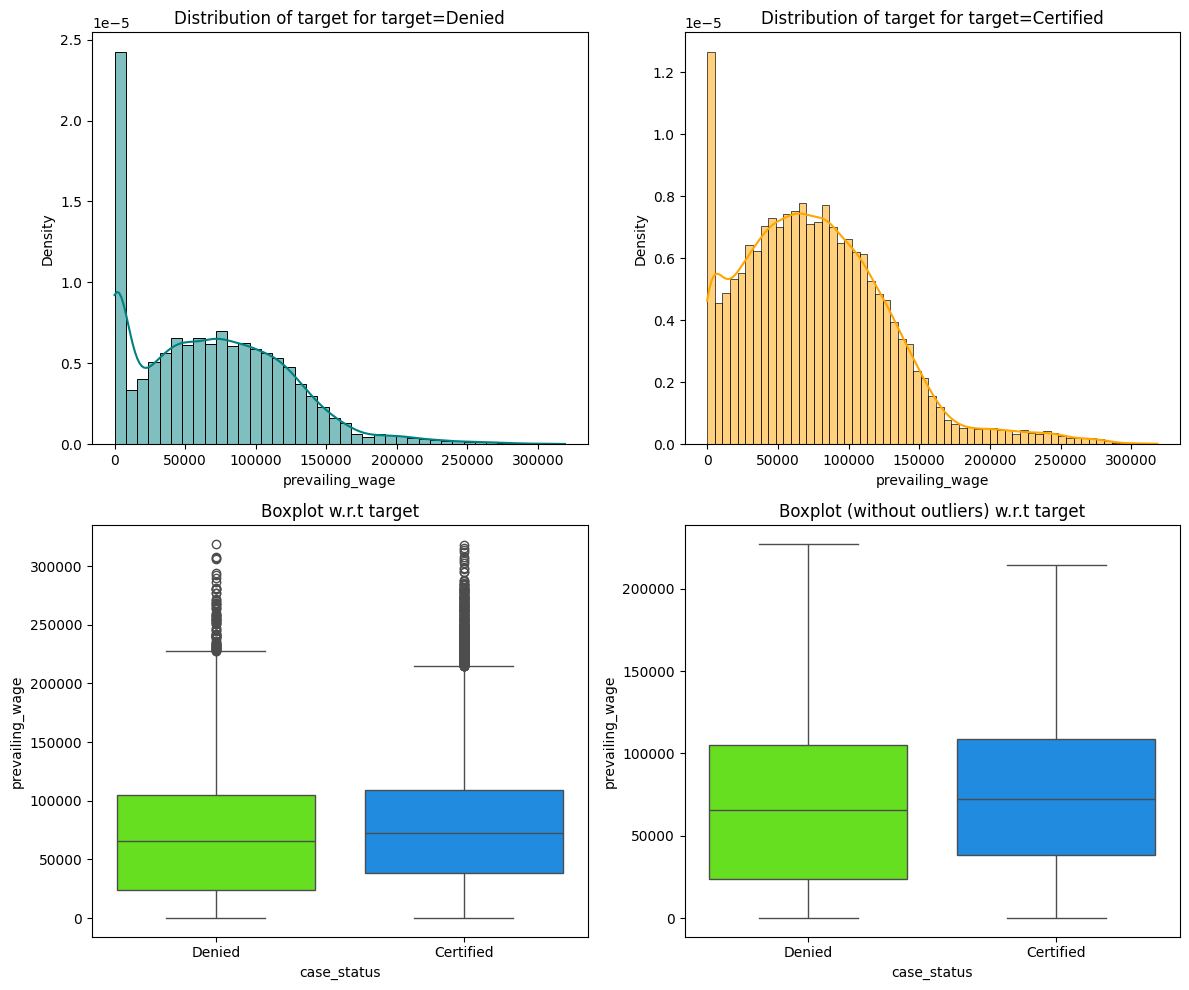

In [98]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

- Certified applications tend to have higher wages on average than Denied ones. The certified distribution peaks around a higher wage range.
- Denied cases have more low-wag
- Both groups have outliers, but Certified cases still show a slightly higher median wage.

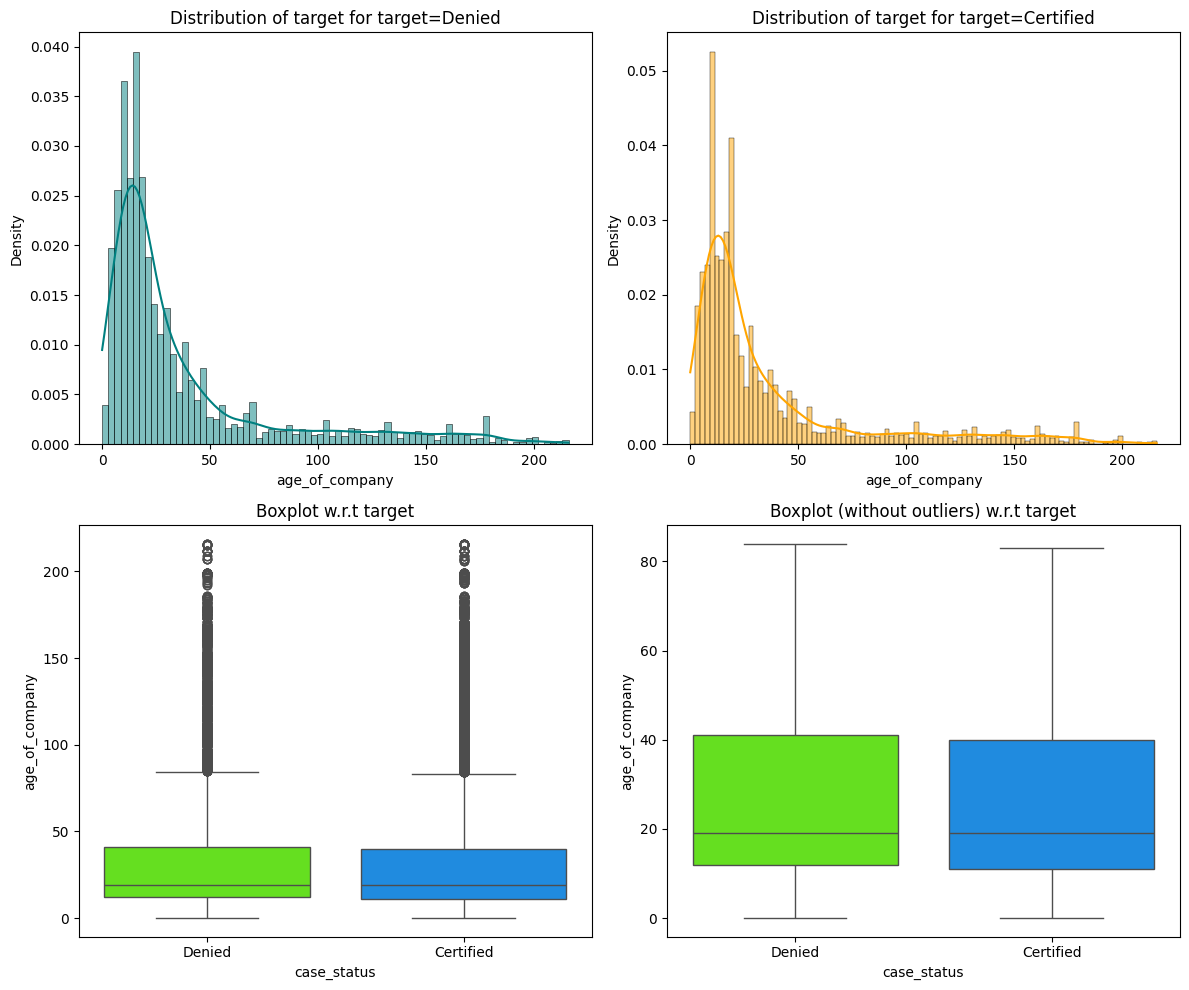

In [99]:
distribution_plot_wrt_target(df, 'age_of_company', 'case_status')

- Both Certified and Denied cases are mostly from younger companies (0–30 years) — distributions look very similar.
- Company age does not show a strong impact on approval.

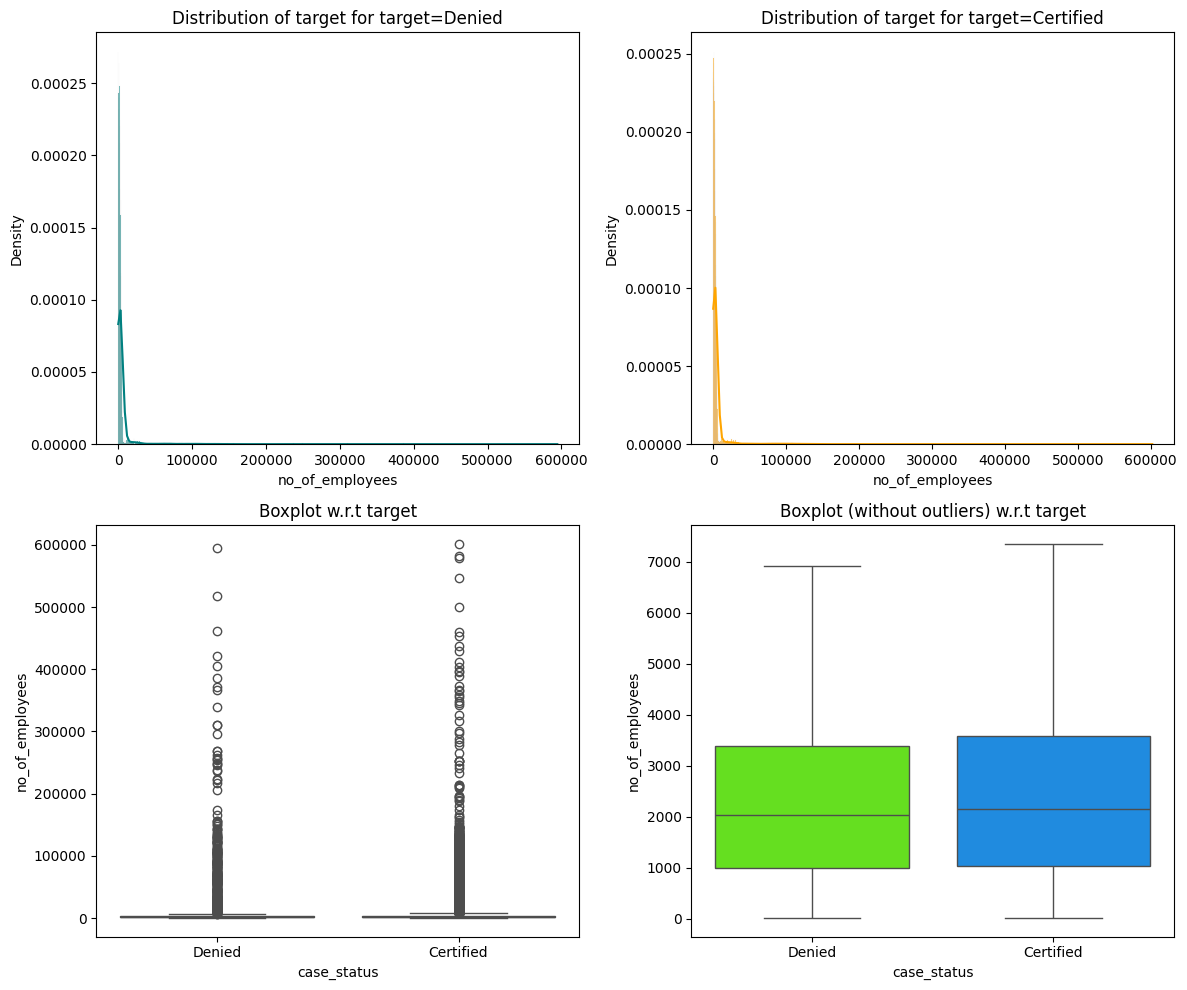

In [100]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

- No strong difference — both Certified and Denied cases mostly come from companies with small employee counts (<5,000).

## Initial Observations

- Higher education levels correlate with higher approval rates. Applicants with Master's and Doctorate degrees have the highest certification likelihood, while High School applicants face more frequent denials.

- Prior job experience increases certification rates. Applicants with relevant experience show noticeably better outcomes compared to those without experience.

- Higher wage units (Yearly > Monthly > Weekly > Hourly) show much higher certification rates, suggesting that well-paying, stable, long-term roles are viewed more favorably.

- Hourly wage jobs face the highest denial proportion, likely due to concerns about role legitimacy, skill level, or lower compensation.

- Most applicants don't require job training (~88%), and certification rates remain similar for both groups, indicating training requirement is not a major differentiator.

- Full-time vs. part-time positions show similar approval patterns, with full-time roles having only a slight advantage. Full-time status alone does not drive outcomes significantly.

- Most companies are younger than 50 years, but company age does not strongly separate approvals vs denials, aside from very old legacy firms showing slightly better results.

- Region of employment shows mild regional variation, with the Midwest and South showing slightly stronger certification rates compared to the West.

# Data Preprocessing

- Imputing the null values in column `no_of_employees` with median because of the highly skewed nature of the distribution

In [101]:
df['no_of_employees'] = df['no_of_employees'].fillna(df['no_of_employees'].median())

- Using one-hot encoding to create dummy variables for the categorical columns

In [102]:
df = pd.get_dummies(df, columns=['continent', 'has_job_experience' , 'requires_job_training' , 'region_of_employment', 'unit_of_wage', 'full_time_position'], drop_first=True, dtype='int')

- Since column `education_of_employee` has a hierarchy we don't use one-hot encoding

In [103]:
df['education_of_employee'] = df['education_of_employee'].replace({"High School":1, "Bachelor's":2, "Master's":3, "Doctorate":4})

- Replacing the values in the target column `case_status` with 1 and 0 representing the Certified and Denied values respectively

In [104]:
df['case_status'] = df['case_status'].replace({"Certified":1, "Denied":0})

In [105]:
# Number of applications where prevailing wages is < $7.25 which the legal minimum wage
df[df['prevailing_wage']<7.25].shape

(11, 20)

Note : Prevailing wage means the average wage for similar workers in that occupation.

- Around 11 records had a prevailing wage below \$7/hour, which is not legally possible under U.S. federal wage regulations.
- Since the prevailing wage must reflect the average wage for similar jobs in the region, any value below the federal minimum wage indicates law violation and might be data entry errors.
- These values were therefore corrected by replacing them with $7.25/hr (the U.S. federal minimum wage).

In [106]:
df.loc[df['prevailing_wage']<7.25, 'prevailing_wage'] = 7.25

**Outlier Detection & Treatment**

- For feature `no_of_employees` and `prevailing_wage` there is extreme right-skewness because of outlier values
- However, they seem to be legit as outliers so we can keep those values

**Splitting Data into Train, Test & Vaildation Sets**

In [107]:
X = df.drop(['case_status'], axis=1)
y = df['case_status']

In [108]:
# Split whole dataset into temp and test set
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Split temp set into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [109]:
print("Shape of Training set : ", x_train.shape)
print("Shape of Validation set : ", x_val.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(1))
print("Percentage of classes in validation set:")
print(y_val.value_counts(1))
print("Percentage of classes in test set:")
print(y_test.value_counts(1))

Shape of Training set :  (15288, 19)
Shape of Validation set :  (5096, 19)
Shape of test set :  (5096, 19)
Percentage of classes in training set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


# Model Building

**Model Evaluation Criterion**

Models can make wrong predications as :
1. The model predicted that the visa will be certified, but in reality the case was denied
(False Positive)

2. The model predicted that the visa will be denied, but in reality the applicant was eligible and should have been certified
(False Negative)

**Which case is more important?**

The second case is more important because failing to identify eligible applicants can lead to significant business and operational issues for OFLC, such as:

- Missing out on qualified, high-skilled candidates

- Incorrectly rejecting applicants who could fill critical labor shortages

**`To reduce the above kind of loss, ie, False Negative we need to maximize the Recall`**

In [110]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [111]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [112]:
def print_results(title, train_dict, val_dict):
    print("\n" + "="*60)
    print(f"{title:^60}")
    print("="*60)
    print(f"{'Model':<25} {'Train Recall':<15} {'Validation Recall':<15}")
    print("-"*60)

    for name in models:
        print(f"{name:<25} {train_dict[name]:<15.4f} {val_dict[name]:<15.4f}")

    print("="*60 + "\n")

## Model Building - Original Data

**Decision Tree**

In [113]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)
dtree_originalData_train = model_performance_classification(dtree, x_train, y_train)
dtree_originalData_test = model_performance_classification(dtree, x_test, y_test)

**Bagging Classifier**

In [114]:
bagging_clf = BaggingClassifier(random_state=1)
bagging_clf.fit(x_train, y_train)
bagging_clf_originalData_train = model_performance_classification(bagging_clf, x_train, y_train)
bagging_clf_originalData_test = model_performance_classification(bagging_clf, x_test, y_test)

**Random Forest Classsifer**

In [115]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_clf_originalData_train = model_performance_classification(rf_clf, x_train, y_train)
rf_clf_originalData_test = model_performance_classification(rf_clf, x_test, y_test)

**AdaBoost Classifier**

In [116]:
adaboost_clf = AdaBoostClassifier(random_state=1)
adaboost_clf.fit(x_train, y_train)
adaboost_clf_originalData_train = model_performance_classification(adaboost_clf, x_train, y_train)
adaboost_clf_originalData_test = model_performance_classification(adaboost_clf, x_test, y_test)

**Gradient Boosting Classifier**

In [117]:
gradient_blf = GradientBoostingClassifier(random_state=1)
gradient_blf.fit(x_train, y_train)
gradient_blf_originalData_train = model_performance_classification(gradient_blf, x_train, y_train)
gradient_blf_originalData_test = model_performance_classification(gradient_blf, x_test, y_test)

**XG Boost Classifier**

In [118]:
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(x_train, y_train)
xgb_clf_originalData_train = model_performance_classification(xgb_clf, x_train, y_train)
xgb_clf_originalData_test = model_performance_classification(xgb_clf, x_test, y_test)

**Performance Comparison of Models**

In [119]:
models_train_comp_original = pd.concat(
    [
        dtree_originalData_train.T,
        bagging_clf_originalData_train.T,
        rf_clf_originalData_train.T,
        adaboost_clf_originalData_train.T,
        gradient_blf_originalData_train.T,
        xgb_clf_originalData_train.T
    ],
    axis=1,
)
models_train_comp_original.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Training performance comparison:")
models_train_comp_original

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,1.0,0.986656,1.0,0.738291,0.755560,0.858189
Recall,1.0,0.987659,1.0,0.888247,0.878550,0.945054
Precision,1.0,0.992324,1.0,0.760248,0.782245,0.857232
F1,1.0,0.989986,1.0,0.819278,0.827605,0.899003


In [120]:
models_test_comp_original = pd.concat(
    [
        dtree_originalData_test.T,
        bagging_clf_originalData_test.T,
        rf_clf_originalData_test.T,
        adaboost_clf_originalData_test.T,
        gradient_blf_originalData_test.T,
        xgb_clf_originalData_test.T
    ],
    axis=1,
)
models_test_comp_original.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Testing performance comparison:")
models_test_comp_original

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,0.655416,0.690738,0.710754,0.731162,0.741954,0.719976
Recall,0.740012,0.774089,0.833725,0.883373,0.875441,0.850764
Precision,0.743068,0.765543,0.757608,0.755528,0.769827,0.759109
F1,0.741537,0.769793,0.793846,0.814464,0.819244,0.802327


- AdaBoost shows the strongest overall performance on the original (imbalanced) dataset, with consistently high recall and F1-score across training, validation, and testing.

- Gradient Boosting and XGBoost follow closely, delivering stable validation and test results, indicating good generalization and minimal overfitting.

- Decision Tree performs perfectly on the training set but drops sharply on validation and test metrics, indicating severe overfitting.

- Bagging Classifier improves stability compared to a single Decision Tree but still shows a noticeable gap between training and validation performance.

- Random Forest shows strong training accuracy but struggles to maintain high recall on validation and test data, suggesting overfitting on majority class patterns.

- Boosting models (AdaBoost, Gradient Boost, XGBoost) outperform bagging-based models on the imbalanced dataset because they iteratively focus on difficult-to-classify minority cases.

- Since recall is the priority, AdaBoost becomes the preferred model because it consistently captures the maximum proportion of certified visas while keeping overall performance balanced.

- Gradient Boosting and XGBoost can be considered strong secondary options, especially when additional tuning is applied.

- Tree-based and bagging models are unreliable under imbalance and should not be selected for final deployment.

## Model Building - Oversampled Data


In [121]:
sm = SMOTE(random_state=1, sampling_strategy=1, k_neighbors=5)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

**Decision Tree**

In [122]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train_sm, y_train_sm)
dtree_SMOTE_train = model_performance_classification(dtree, x_train_sm, y_train_sm)
dtree_SMOTE_test = model_performance_classification(dtree, x_test, y_test)

**Bagging Classifier**

In [123]:
bagging_clf = BaggingClassifier(random_state=1)
bagging_clf.fit(x_train_sm, y_train_sm)
bagging_clf_SMOTE_train = model_performance_classification(bagging_clf, x_train_sm, y_train_sm)
bagging_clf_SMOTE_test = model_performance_classification(bagging_clf, x_test, y_test)

**Random Forest Classifier**

In [124]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train_sm, y_train_sm)
rf_clf_SMOTE_train = model_performance_classification(rf_clf, x_train_sm, y_train_sm)
rf_clf_SMOTE_test = model_performance_classification(rf_clf, x_test, y_test)

**Ada Boost Classifier**

In [125]:
adaboost_clf = AdaBoostClassifier(random_state=1)
adaboost_clf.fit(x_train_sm, y_train_sm)
adaboost_clf_SMOTE_train = model_performance_classification(adaboost_clf, x_train_sm, y_train_sm)
adaboost_clf_SMOTE_test = model_performance_classification(adaboost_clf, x_test, y_test)

**Gradient Boosting Classifier**

In [126]:
gradient_blf = GradientBoostingClassifier(random_state=1)
gradient_blf.fit(x_train_sm, y_train_sm)
gradient_blf_SMOTE_train = model_performance_classification(gradient_blf, x_train_sm, y_train_sm)
gradient_blf_SMOTE_test = model_performance_classification(gradient_blf, x_test, y_test)

**XGBoost Classifier**

In [127]:
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(x_train_sm, y_train_sm)
xgb_clf_SMOTE_train = model_performance_classification(xgb_clf, x_train_sm, y_train_sm)
xgb_clf_SMOTE_test = model_performance_classification(xgb_clf, x_test, y_test)

**Performance Comparison of Models**

In [128]:
models_train_comp_SMOTE = pd.concat(
    [
        dtree_SMOTE_train.T,
        bagging_clf_SMOTE_train.T,
        rf_clf_SMOTE_train.T,
        adaboost_clf_SMOTE_train.T,
        gradient_blf_SMOTE_train.T,
        xgb_clf_SMOTE_train.T
    ],
    axis=1,
)
models_train_comp_SMOTE.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Training performance comparison:")
models_train_comp_SMOTE

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,1.0,0.987071,0.999951,0.768952,0.803232,0.876347
Recall,1.0,0.981489,0.999902,0.771499,0.828404,0.904897
Precision,1.0,0.992571,1.000000,0.767589,0.788698,0.856018
F1,1.0,0.986999,0.999951,0.769539,0.808063,0.879779


In [129]:
models_test_comp_SMOTE = pd.concat(
    [
        dtree_SMOTE_test.T,
        bagging_clf_SMOTE_test.T,
        rf_clf_SMOTE_test.T,
        adaboost_clf_SMOTE_test.T,
        gradient_blf_SMOTE_test.T,
        xgb_clf_SMOTE_test.T
    ],
    axis=1,
)
models_test_comp_SMOTE.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Testing performance comparison:")
models_test_comp_SMOTE

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,0.646389,0.678375,0.705455,0.700549,0.731554,0.720369
Recall,0.718273,0.750294,0.804642,0.776439,0.822268,0.823443
Precision,0.743613,0.763984,0.766154,0.775528,0.785794,0.772815
F1,0.730723,0.757077,0.784926,0.775984,0.803618,0.797326


- The training scores for all models are extremely high due to SMOTE, but the drop in test performance shows that several models are overfitting.

- Decision Tree shows severe overfitting, with perfect training metrics but the lowest test recall, indicating poor generalization.

- Bagging performs slightly better than a single decision tree but still suffers from overfitting on SMOTE data.

- Random Forest achieves strong training performance but only moderate test recall, showing it cannot generalize well on oversampled data.

- AdaBoost has slightly lower training recall but produces more stable and consistent test metrics than the tree-based models.

- Gradient Boosting generalizes better than most models, achieving one of the highest test recall values.

- XGBoost gives the highest recall on the test set, showing it handles oversampled data most effectively.

- Boosting models (Gradient Boost & XGBoost) show less overfitting compared to Decision Tree, Bagging, and Random Forest.

- XGBoost provides the best balance between recall, precision, and F1-score among all SMOTE models.

- Gradient Boosting is a close second and a strong, reliable alternative to XGBoost.

- Overall, tree-based bagging methods and Random Forest tend to overfit heavily on SMOTE-generated data.

## Model Building - Undersampled Data

In [130]:
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

**Decision Tree Classifier**

In [131]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train_un, y_train_un)
dtree_RUS_train = model_performance_classification(dtree, x_train_un, y_train_un)
dtree_RUS_test = model_performance_classification(dtree, x_test, y_test)

**Bagging Classifier**

In [132]:
bagging_clf = BaggingClassifier(random_state=1)
bagging_clf.fit(x_train_un, y_train_un)
bagging_clf_RUS_train = model_performance_classification(bagging_clf, x_train_un, y_train_un)
bagging_clf_RUS_test = model_performance_classification(bagging_clf, x_test, y_test)

**Random Forest Classifier**

In [133]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train_un, y_train_un)
rf_clf_RUS_train = model_performance_classification(rf_clf, x_train_un, y_train_un)
rf_clf_RUS_test = model_performance_classification(rf_clf, x_test, y_test)

**AdaBoost Classifier**

In [134]:
adaboost_clf = AdaBoostClassifier(random_state=1)
adaboost_clf.fit(x_train_un, y_train_un)
adaboost_clf_RUS_train = model_performance_classification(adaboost_clf, x_train_un, y_train_un)
adaboost_clf_RUS_test = model_performance_classification(adaboost_clf, x_test, y_test)

**Gradient Boost Classifier**

In [135]:
gradient_blf = GradientBoostingClassifier(random_state=1)
gradient_blf.fit(x_train_un, y_train_un)
gradient_blf_RUS_train = model_performance_classification(gradient_blf, x_train_un, y_train_un)
gradient_blf_RUS_test = model_performance_classification(gradient_blf, x_test, y_test)

**XG Boost Classiifier**

In [136]:
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(x_train_un, y_train_un)
xgb_clf_RUS_train = model_performance_classification(xgb_clf, x_train_un, y_train_un)
xgb_clf_RUS_test = model_performance_classification(xgb_clf, x_test, y_test)

**Performance Comparison of Models**

In [137]:
models_train_comp_RUS = pd.concat(
    [
        dtree_RUS_train.T,
        bagging_clf_RUS_train.T,
        rf_clf_RUS_train.T,
        adaboost_clf_RUS_train.T,
        gradient_blf_RUS_train.T,
        xgb_clf_RUS_train.T
    ],
    axis=1,
)
models_train_comp_RUS.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Training performance comparison:")
models_train_comp_RUS

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,1.0,0.980898,1.0,0.690725,0.721052,0.869535
Recall,1.0,0.968492,1.0,0.711501,0.750689,0.873572
Precision,1.0,0.993134,1.0,0.683116,0.708682,0.866576
F1,1.0,0.980658,1.0,0.697019,0.729081,0.870060


In [138]:
models_test_comp_RUS = pd.concat(
    [
        dtree_RUS_test.T,
        bagging_clf_RUS_test.T,
        rf_clf_RUS_test.T,
        adaboost_clf_RUS_test.T,
        gradient_blf_RUS_test.T,
        xgb_clf_RUS_test.T
    ],
    axis=1,
)
models_test_comp_RUS.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "Xgboost"
]
print("Testing performance comparison:")
models_test_comp_RUS

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,Ada Boost,Gradient Boost,Xgboost
Accuracy,0.624608,0.637951,0.675824,0.696625,0.711735,0.679356
Recall,0.630141,0.608402,0.674501,0.715041,0.742656,0.687427
Precision,0.766345,0.801781,0.808451,0.808638,0.809997,0.804124
F1,0.691601,0.691832,0.735426,0.758965,0.774866,0.741210


- Undersampling reduces overfitting in most models, but it also lowers overall accuracy because the majority class information is lost.

- Boosting models (AdaBoost, Gradient Boost, XGBoost) again outperform bagging-based and tree-based models, with higher recall and balanced F1-scores on the test set.

- AdaBoost performs best among all models in RUS, giving the strongest recall and the highest F1-score, making it the most reliable under reduced data.

- Gradient Boost and XGBoost perform consistently well and generalize better than bagging and random forests on the undersampled dataset.

- Decision Tree shows a big drop in recall and F1-score after undersampling, confirming that simple models struggle when the dataset becomes smaller and noisier.

- Bagging and Random Forest improve over Decision Tree but still lag behind boosting methods, indicating they rely more on having enough majority-class samples.

- Undersampling helped reduce overfitting seen earlier, but at the cost of losing predictive power — boosting models mitigate this loss the best.

- Compared to SMOTE results, RUS models generally perform worse, making undersampling a less optimal strategy for this problem.

## Model Performance Improvement using Hyperparameter Tuning


**Note :**

- Boosting models (Gradient Boosting, AdaBoost, XGBoost) were chosen for tuning because they already showed strong recall in test dataset and have high potential to improve further.

- Models like Decision Tree, Bagging, and Random Forest were not tuned because they showed clear overfitting or weak generalization even after resampling.

**Gradient Boosting Classifer**

In [139]:
gradient_blf = GradientBoostingClassifier(random_state=1)
parameters = {
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_depth":np.arange(3,6),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(gradient_blf, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(x_train, y_train)

tuned_gradient_params = grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [140]:
print(tuned_gradient_params)

{'n_estimators': 150, 'min_samples_leaf': np.int64(5), 'min_impurity_decrease': 0.003, 'max_features': np.float64(0.4000000000000001), 'max_depth': np.int64(3)}


In [141]:
gradient_clf_tuned = GradientBoostingClassifier(**tuned_gradient_params)
gradient_clf_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=np.int64(3),
                           max_features=np.float64(0.4000000000000001),
                           min_impurity_decrease=0.003,
                           min_samples_leaf=np.int64(5), n_estimators=150)

In [142]:
print("Performance on Training DataSet")
gbclf_tuned_train = model_performance_classification(gradient_clf_tuned, x_train, y_train)
gbclf_tuned_train

Performance on Training DataSet


,Accuracy,Recall,Precision,F1
0,0.757391,0.877277,0.784807,0.82847


In [143]:
print("Performance on Validatiion DataSet")
gbclf_tuned_val = model_performance_classification(gradient_clf_tuned, x_val, y_val)
gbclf_tuned_val

Performance on Validatiion DataSet


,Accuracy,Recall,Precision,F1
0,0.75157,0.870153,0.782356,0.823922


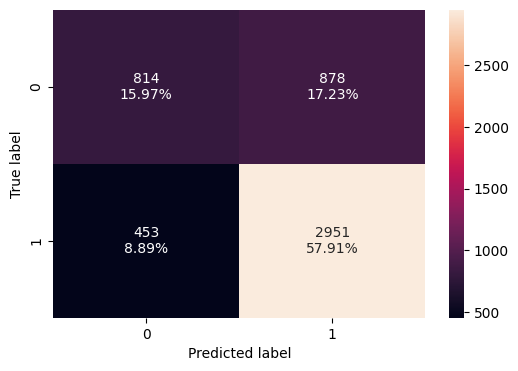

In [144]:
plot_confusion_matrix(gradient_clf_tuned, x_test, y_test)

**AdaBoosting Classifier**

In [145]:
adaboost_clf = AdaBoostClassifier(random_state=1)
parameters = {
    "n_estimators": [150,200,250],
    "learning_rate":[0.1, 0.3, 0.5]
}
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(adaboost_clf, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(x_train, y_train)

tuned_adaboost_params = grid_obj.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [146]:
print(print(tuned_adaboost_params))

{'n_estimators': 150, 'learning_rate': 0.1}
None


In [147]:
adaboost_clf_tuned = AdaBoostClassifier(**tuned_adaboost_params, random_state=1)
adaboost_clf_tuned.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=1)

In [148]:
print("Performance on Training DataSet")
adaclf_tuned_train = model_performance_classification(adaboost_clf_tuned, x_train, y_train)
adaclf_tuned_train

Performance on Training DataSet


,Accuracy,Recall,Precision,F1
0,0.725275,0.927032,0.732585,0.818418


In [149]:
print("Performance on Validation DataSet")
adaclf_tuned_val = model_performance_classification(adaboost_clf_tuned, x_val, y_val)
adaclf_tuned_val

Performance on Validation DataSet


,Accuracy,Recall,Precision,F1
0,0.724882,0.921563,0.734316,0.817353


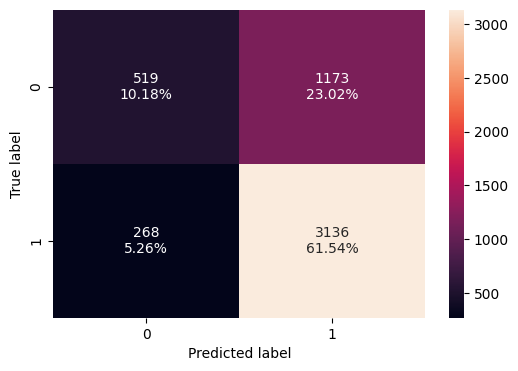

In [150]:
plot_confusion_matrix(adaboost_clf_tuned, x_test, y_test)

**XGBoost Classifier**

In [151]:
xgboost_clf = XGBClassifier(random_state=1)

# scale positive weight parameter
pos = sum(y_train == 1)
neg = sum(y_train == 0)
spw = neg / pos

parameters = {
    "n_estimators": [150,200,250],
    "scale_pos_weight":[spw, spw/2, spw*2],
    "max_depth": np.arange(3,6),
    "learning_rate":[0.1, 0.3, 0.5]
}
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(xgboost_clf, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(x_train, y_train)

tuned_xgboost_params = grid_obj.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [152]:
print(print(tuned_xgboost_params))

{'scale_pos_weight': 0.9947110675808032, 'n_estimators': 150, 'max_depth': np.int64(3), 'learning_rate': 0.1}
None


In [153]:
xgboost_clf_tuned = XGBClassifier(**tuned_xgboost_params, random_state=1)
xgboost_clf_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(3), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None, ...)

In [154]:
print("Performance on Training DataSet")
xgbclf_tuned_train = model_performance_classification(xgboost_clf_tuned, x_train, y_train)
xgbclf_tuned_train

Performance on Training DataSet


,Accuracy,Recall,Precision,F1
0,0.758307,0.882076,0.783335,0.829778


In [155]:
print("Performance on Validation DataSet")
xgbclf_tuned_val = model_performance_classification(xgboost_clf_tuned, x_val, y_val)
xgbclf_tuned_val

Performance on Validation DataSet


,Accuracy,Recall,Precision,F1
0,0.758046,0.880729,0.783791,0.829437


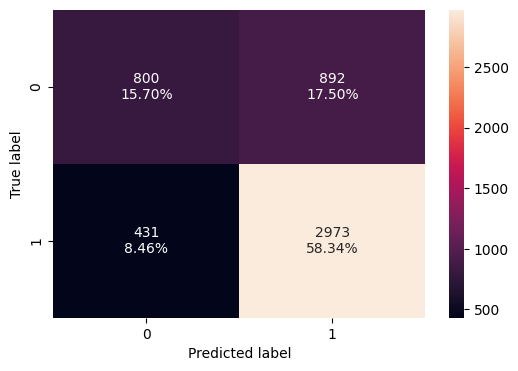

In [156]:
plot_confusion_matrix(xgboost_clf_tuned, x_test, y_test)

- Gradient Boosting improved recall after tuning, showing better balance between training and validation performance without significant overfitting.

- The tuned Gradient Boost model captures more borderline cases (minority class), which aligns with the business objective of reducing false negatives.

- AdaBoost benefited from tuning the number of estimators and learning rate, resulting in more stable validation recall and a stronger F1-score.

- The tuned XGBoost model offers the best balance of recall and precision among the three, making it more suitable for cost-sensitive classification.

- All three tuned models show higher recall in validation than their untuned versions, confirming that the tuning successfully aligned the models with the business objective.

- Confusion matrices for all tuned models show a reduction in false negatives, which is critical for visa approval analytics.

# Model Performance Comparison and Final Model Selection


**Training Performance Comparision**

In [157]:
models_train_comp_df = pd.concat(
    [
        gbclf_tuned_train.T,
        adaclf_tuned_train.T,
        xgbclf_tuned_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Ada Boost Tuned with Random search",
    "Xgboost Tuned with Random Search"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boost Tuned with Random search,Ada Boost Tuned with Random search,Xgboost Tuned with Random Search
Accuracy,0.757391,0.725275,0.758307
Recall,0.877277,0.927032,0.882076
Precision,0.784807,0.732585,0.783335
F1,0.828470,0.818418,0.829778


In [158]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbclf_tuned_val.T,
        adaclf_tuned_val.T,
        xgbclf_tuned_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
     "Gradient Boost Tuned with Random search",
    "Ada Boost Tuned with Random search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boost Tuned with Random search,Ada Boost Tuned with Random search,Xgboost Tuned with Random Search
Accuracy,0.751570,0.724882,0.758046
Recall,0.870153,0.921563,0.880729
Precision,0.782356,0.734316,0.783791
F1,0.823922,0.817353,0.829437


- Since, AdaBoost has the highest recall(0.92) among the tuned model and shows consistent results in training and validation sets, we can check its performance on testing data

In [159]:
print("Performance on Testing DataSet")
adaclf_tuned_test = model_performance_classification(adaboost_clf_tuned, x_test, y_test)
adaclf_tuned_test

Performance on Testing DataSet


,Accuracy,Recall,Precision,F1
0,0.717229,0.921269,0.727779,0.813173


- Thus, we can select AdaBoosting as the best model because of its high recall score(~0.92) which is consistent across all train, validation and test models.
- This implies the AdaBoost model doesn't have overfitting/underfitting

**Feature Importances**

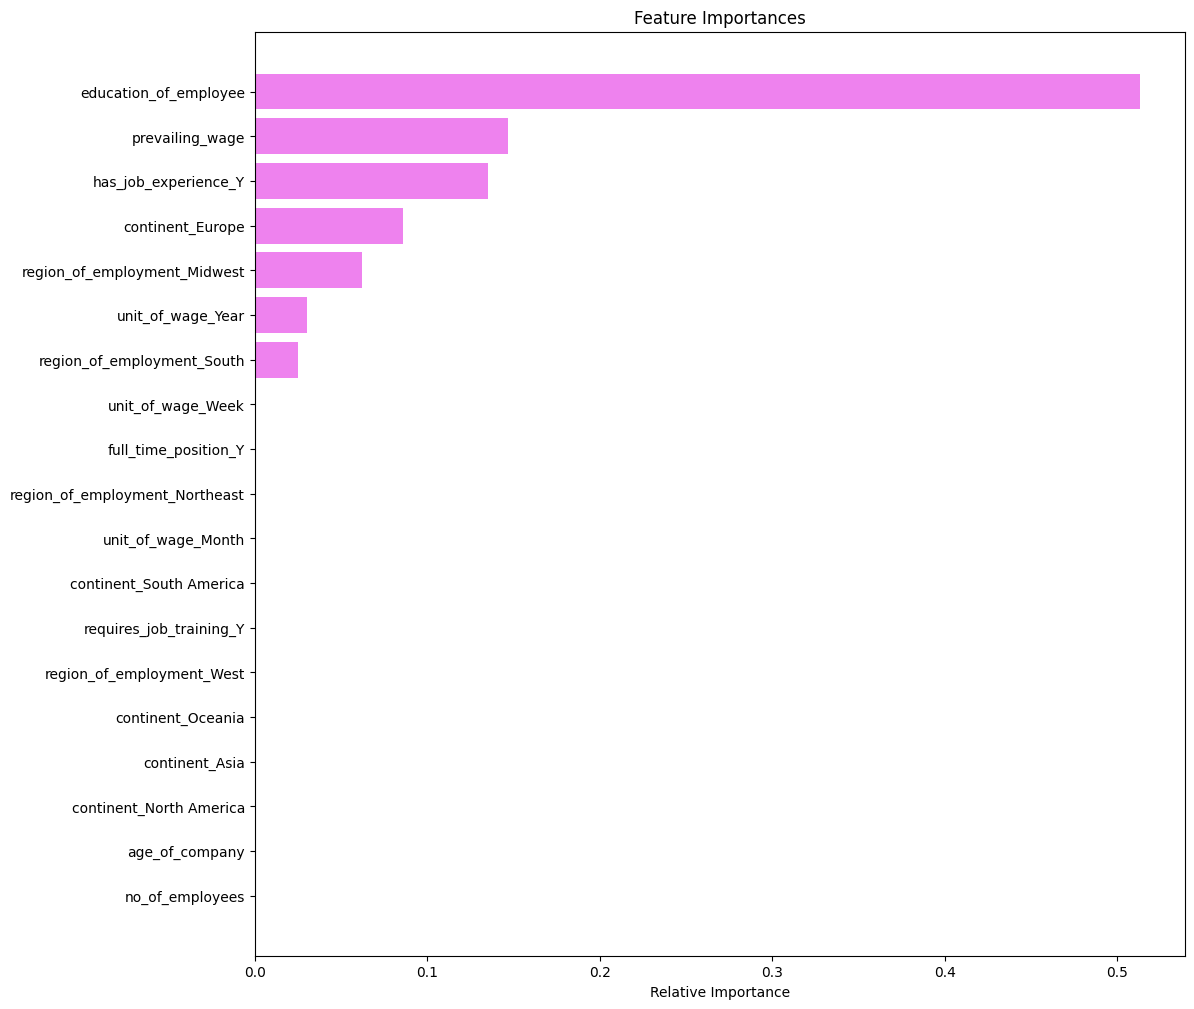

In [160]:
feature_names = x_train.columns
importances = adaboost_clf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- All three tuned models (Gradient Boost, AdaBoost, XGBoost) show strong recall, but AdaBoost achieves the highest validation recall (~0.92) while maintaining balanced precision and F1-score.

- AdaBoost demonstrates consistent performance across training, validation, and testing sets, indicating no overfitting or underfitting.

- The tuned AdaBoost model reliably identifies a higher proportion of actual certified cases (minority class), aligning with the business objective of minimizing false negatives.

- XGBoost and Gradient Boost also perform well but show slightly lower recall compared to AdaBoost, making them secondary choices.

- The test-set performance of the tuned AdaBoost model confirms its generalization capability, reinforcing it as the best candidate for final deployment.

- Feature importance analysis from the tuned AdaBoost model highlights education, prevailing wage, and job experience as the key drivers of visa certification outcomes.

- These top features provide actionable insights for policy and employer guidance, helping prioritize high-impact applicant attributes in the screening process.

# Business Insights & Recommendations

- Higher education (Master's, Doctorate) strongly improves certification likelihood.**Recommendation**: Prioritize sponsoring highly qualified candidates and highlight their advanced degrees in petitions to strengthen approval outcomes.

- Applicants with prior job experience have significantly higher approval rates.**Recommendation**: Emphasize relevant work history in all documentation and prefer experienced candidates for sponsorship to reduce denial risk.

- Higher prevailing wages correlate with greater certification success.
**Recommendation**: Offer competitive salaries well above minimum thresholds and avoid filing cases with borderline wage levels.

- Annual wage structures outperform hourly or weekly wage types during evaluation.
**Recommendation**: Wherever possible, convert roles into full-time annual salary positions to increase perceived job stability.

- Geographic region shows mild impact, with certain regions reflecting slightly stronger approval trends.
**Recommendation**: Strengthen hiring efforts in regions with historically better outcomes and use region-based risk expectations in planning.

- Training requirements and full-time status show minimal influence on certification outcomes.
**Recommendation**: Do not rely on these variables to predict approvals; focus instead on wages, qualifications, and experience.

- Company demographics (size and age) have weak correlation with certification results.
**Recommendation**: Maintain accurate company records, but invest strategic effort in improving job role quality and applicant profiles rather than altering organizational characteristics.